In [29]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

EPSILON = 0.005

import coco
import yolo
import vgg

repo_dir = project_name = 'COTSDataset' 
part1_single_objects = os.path.join(repo_dir, "Part 1 - Single Objects")
part2_multiple_objects = os.path.join(repo_dir, "Part 2 - Multiple Objects")
part3_complex_background = os.path.join(repo_dir, "Part 3 - Complex Background")


do_display = True
do_save = True

# COCO
coco_output_dir = "COCO_annotations"
coco_color = (255, 0, 255)

# YOLO
yolo_output_dir = "YOLO_annotations"
yolo_color = (0, 255, 0)

# VGG
vgg_output_dir = "VGG_annotations"
vgg_color = (255, 0, 0)

In [32]:
gt = cv2.imread('COTSDataset/Part 2 - Multiple Objects/souvenirs_no/masks/souvenirs_no_3_colour_mask_1_mask.png')
# original_mask = cv2.cvtColor(original_mask, cv2.COLOR_BGR2GRAY)

In [40]:
base = gt.copy()

In [115]:
image = cv2.imread('COTSDataset/Part 2 - Multiple Objects/souvenirs_no/1_colour.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

**PA**

In [107]:
pa_im = (0, 'souvenirs_no_3_colour_mask_1_mask.png', gt, 'Table', 'souvenir', './')
pa_annotation = coco.annotate(pa_im,
                      do_display=False, do_save=False, annotation_color=(255, 0, 0), epsilon=0.005,configuration=coco.POLY_APPROX, object_configuration=coco.SINGLE_OBJ, do_cvt=True)


 Annotating image:  souvenirs_no_3_colour_mask_1_mask.png
------------------------------------------------------------------------------------------------------------------------


In [195]:
pa_mask = cv2.drawContours(base.copy(), pa_annotation['contours'], -1, (255, 0, 255), 5, cv2.LINE_AA)
pa_mask_on_image = cv2.drawContours(image.copy(), pa_annotation['contours'], -1, (255, 0, 255), 5, cv2.LINE_AA)
pa_mask_on_image_filled = cv2.drawContours(pa_mask_on_image.copy(), pa_annotation['contours'], -1, (255, 0, 255, 255), thickness=cv2.FILLED, lineType=cv2.LINE_AA)
pa_mask_on_image_final = cv2.addWeighted(image.copy(), 0.6, pa_mask_on_image_filled, 0.4, 0)
pa_mask_on_image_final = cv2.drawContours(pa_mask_on_image_final.copy(), pa_annotation['contours'], -1, (255, 0, 255), 5, cv2.LINE_AA)
pa_mask_bbox = cv2.boundingRect(pa_annotation['contours'][0])




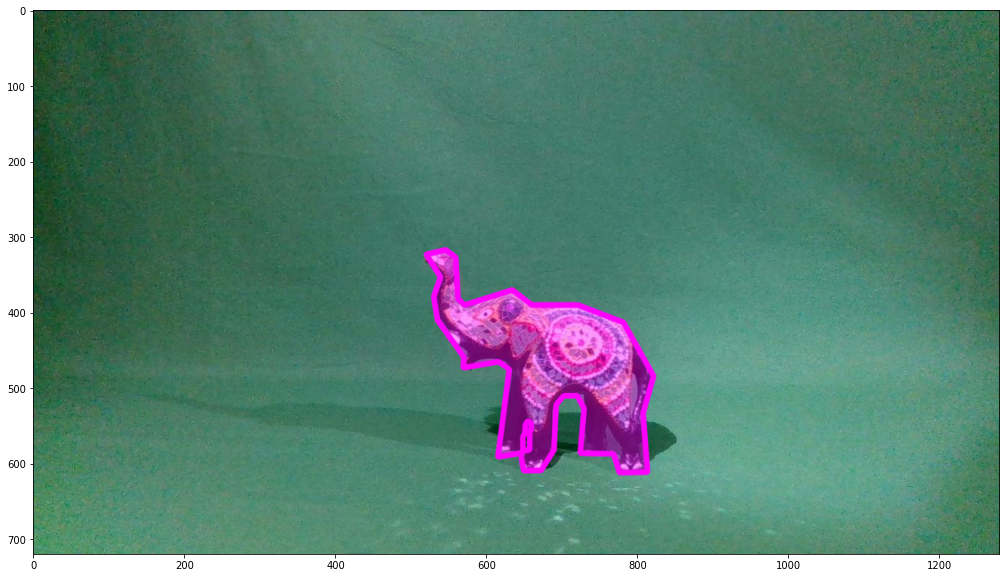

In [197]:
plt.imshow(pa_mask_on_image_final)

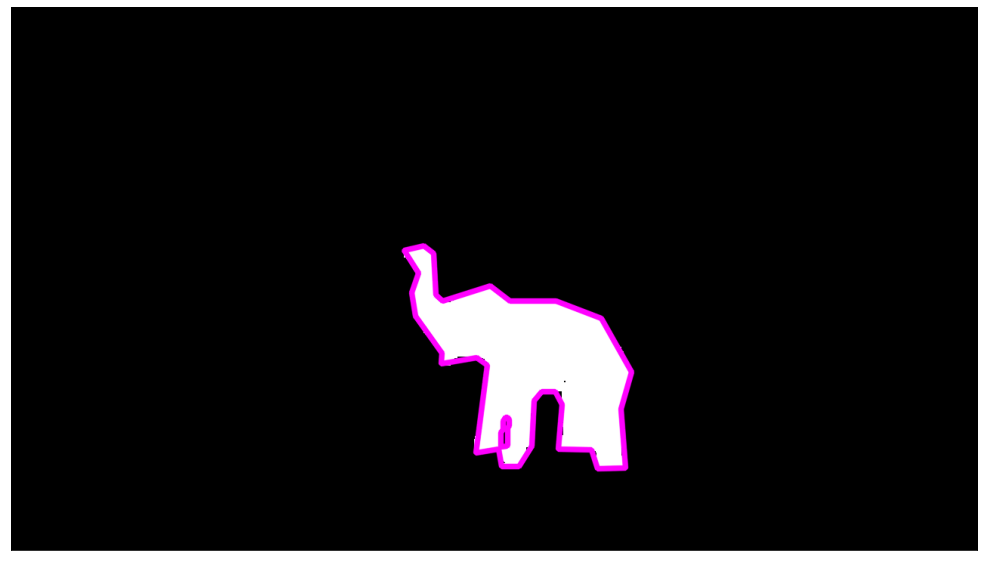

In [111]:
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
plt.imshow(pa_mask)
plt.xticks([])
plt.yticks([])
plt.show()

**KMC**

In [52]:
kmc_im = (0, 'souvenirs_no_3_colour_mask_1_mask.png', gt, 'Table', 'souvenir', './')
kmc_annotation = coco.annotate(kmc_im,
                      do_display=False, do_save=False, annotation_color=(255, 0, 0), epsilon=0.005,configuration=coco.K_MEANS_CLUSTER, object_configuration=coco.SINGLE_OBJ, do_cvt=True)


 Annotating image:  souvenirs_no_3_colour_mask_1_mask.png
------------------------------------------------------------------------------------------------------------------------


In [173]:
kmc_mask = cv2.drawContours(base.copy(), kmc_annotation['contours'], -1, (255, 128, 0), 7, cv2.LINE_AA)
kmc_mask_on_image = cv2.drawContours(image.copy(), kmc_annotation['contours'], -1, (255, 128, 0), 5, cv2.LINE_AA)
kmc_mask_on_image_filled = cv2.drawContours(kmc_mask_on_image.copy(), kmc_annotation['contours'], -1, (255, 128, 0, 255), thickness=cv2.FILLED, lineType=cv2.LINE_AA)
kmc_mask_on_image_final = cv2.addWeighted(image.copy(), 0.6, kmc_mask_on_image_filled, 0.4, 0)
kmc_mask_on_image_final = cv2.drawContours(kmc_mask_on_image_final.copy(), kmc_annotation['contours'], -1, (255, 128, 0), 5, cv2.LINE_AA)

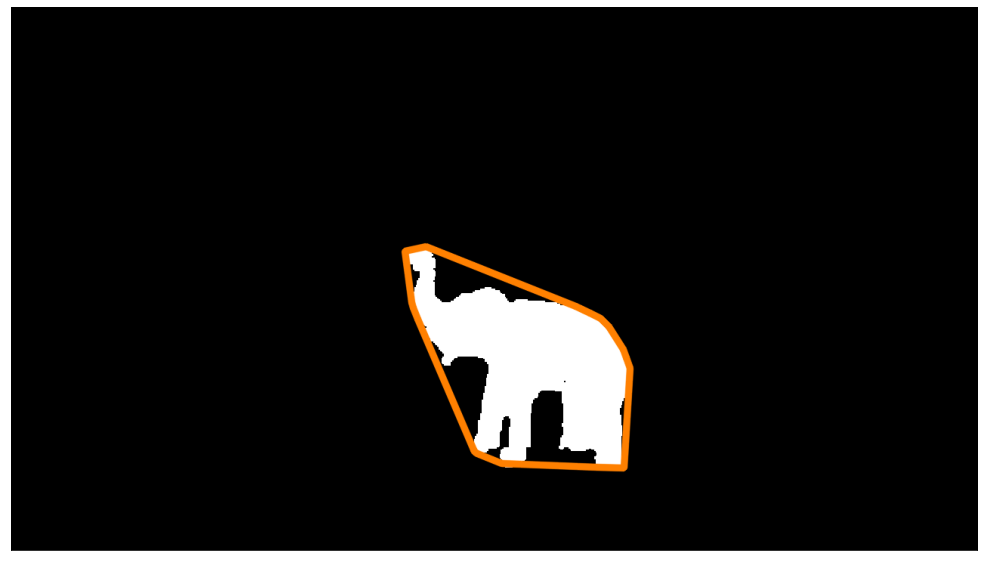

In [112]:
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
plt.imshow(kmc_mask)
plt.xticks([])
plt.yticks([])
plt.show()

**SAM**

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import torch
torch.cuda.empty_cache()
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Segment-anything model
# Downloading model checkpoint:
# Utilise the following link: https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
# Place the downloaded checkpoint in a new directory named Sam_checkpoints
sam_checkpoint = "Sam_checkpoints/sam_vit_b_01ec64.pth"
model_type = "vit_b"
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_batch=16
)

In [86]:
sam_original_mask = cv2.imread('./Figures/table/souvenirs_no_3_colour_mask_1_mask.png')
sam_original_mask = cv2.cvtColor(sam_original_mask, cv2.COLOR_BGR2GRAY)
sam_contours = cv2.findContours(sam_original_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

In [174]:
sam_mask = cv2.drawContours(base.copy(), sam_contours, -1, (0, 0, 255), 7, cv2.LINE_AA)
sam_mask_on_image = cv2.drawContours(image.copy(), sam_contours, -1, (0, 0, 255), 7, cv2.LINE_AA)
sam_mask_on_image_filled = cv2.drawContours(sam_mask_on_image.copy(), sam_contours, -1, (0, 0, 255, 255), thickness=cv2.FILLED, lineType=cv2.LINE_AA)
sam_mask_on_image_final = cv2.addWeighted(image.copy(), 0.6, sam_mask_on_image_filled, 0.4, 0)
sam_mask_on_image_final = cv2.drawContours(sam_mask_on_image_final.copy(), sam_contours, -1, (0, 0, 255), 7, cv2.LINE_AA)

**B_BOX**

In [214]:
contours = cv2.findContours(cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
bbox = cv2.boundingRect(contours[0])
gt_bbox = cv2.rectangle(gt.copy(), (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 5, cv2.LINE_AA)
image_bbox = cv2.rectangle(image.copy(), (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 5, cv2.LINE_AA)
image_bbox_filled = cv2.rectangle(image_bbox.copy(), (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0, 255), thickness=cv2.FILLED, lineType=cv2.LINE_AA)
image_bbox_final = cv2.addWeighted(image.copy(), 0.8, image_bbox_filled, 0.2, 0)
image_bbox_final = cv2.rectangle(image_bbox_final.copy(), (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 5, cv2.LINE_AA)

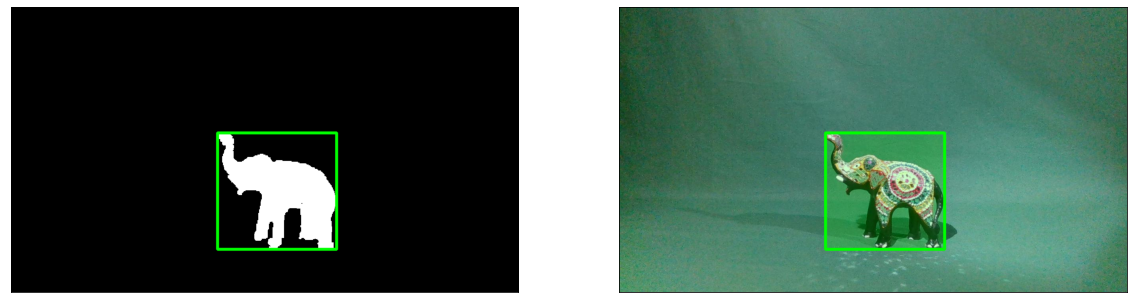

In [215]:
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
plt.subplot(121)
plt.imshow(gt_bbox)
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(image_bbox_final)
plt.xticks([])
plt.yticks([])
plt.show()

**Plot**

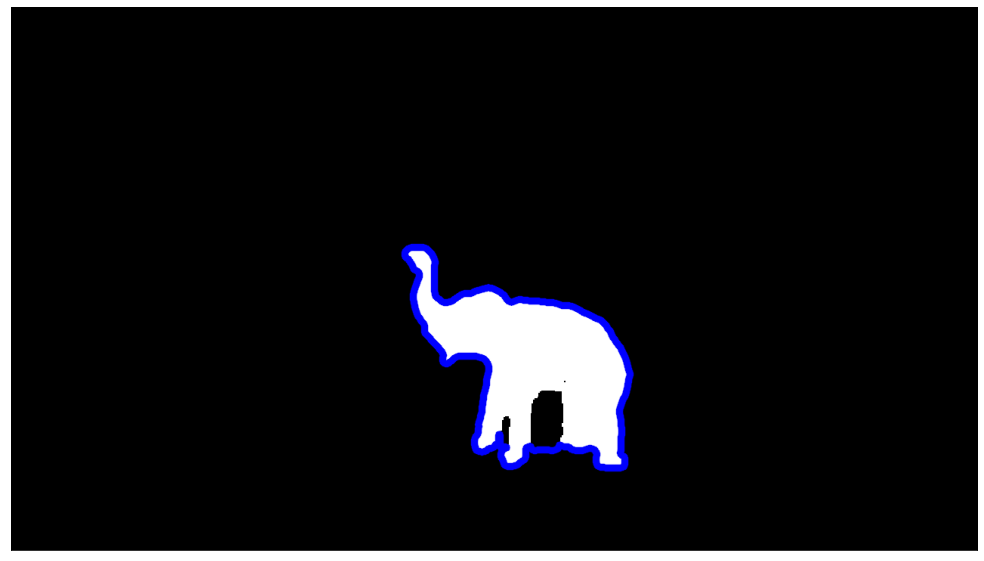

In [91]:
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
plt.imshow(sam_mask)
plt.xticks([])
plt.yticks([])
plt.show()

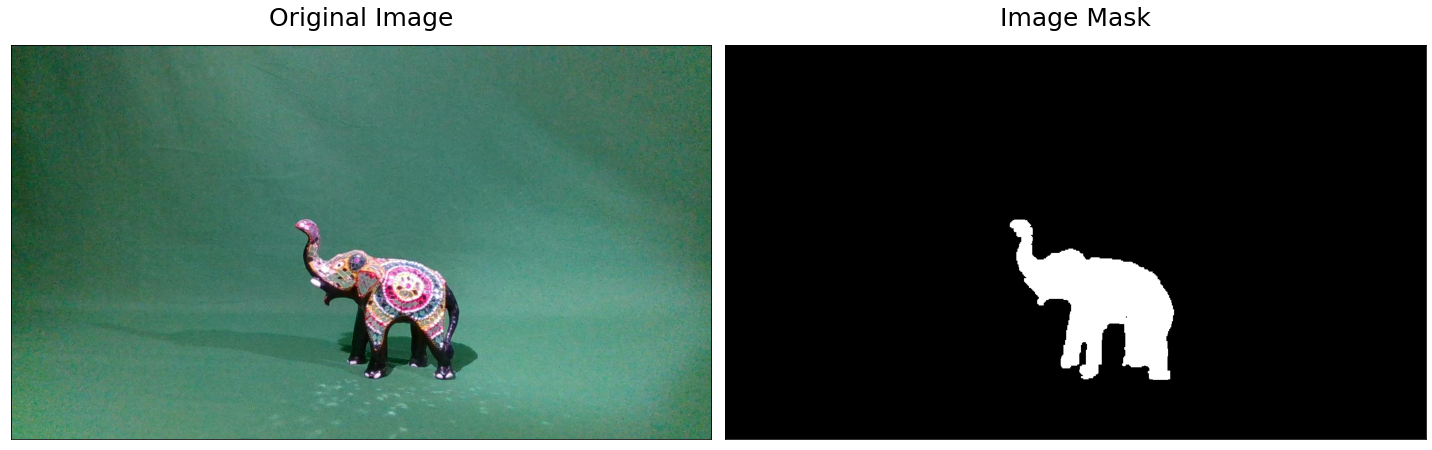

In [282]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(1, 2)

ax[0].imshow(image)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(gt)
ax[1].set_xticks([])
ax[1].set_yticks([])

col_labels = ['Original Image', 'Image Mask']
for i, col_label in enumerate(col_labels):
    ax[i].set_title(col_label, size=25, pad=20)

fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

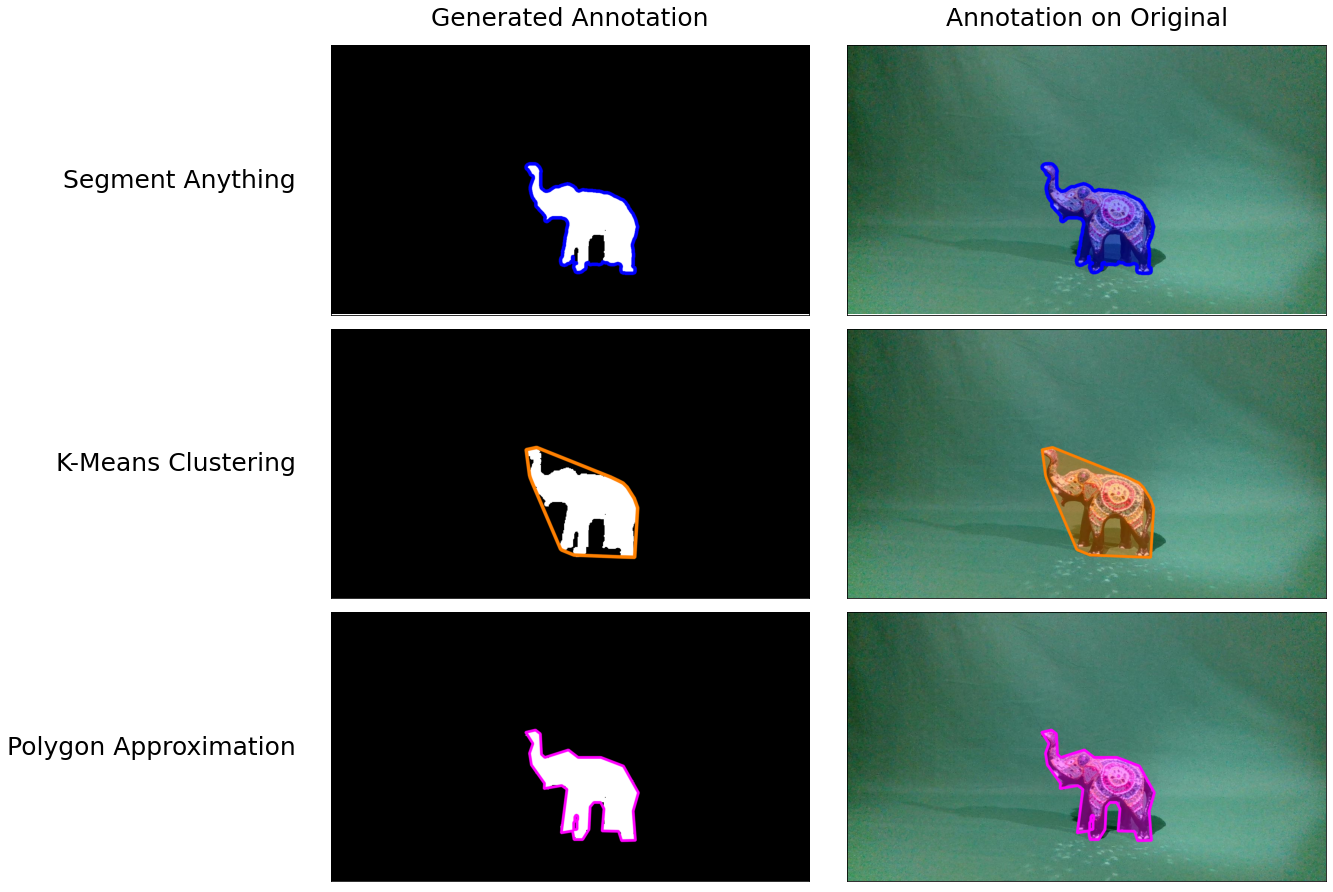

In [288]:
plt.rcParams["figure.figsize"] = (20, 12.5)
fig, ax = plt.subplots(3, 2)

ax[0, 0].imshow(sam_mask)
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])

ax[0, 1].imshow(sam_mask_on_image_final)
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])

ax[1, 0].imshow(kmc_mask)
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])

ax[1, 1].imshow(kmc_mask_on_image_final)
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])

ax[2, 0].imshow(pa_mask)
ax[2, 0].set_xticks([])
ax[2, 0].set_yticks([])

ax[2, 1].imshow(pa_mask_on_image_final)
ax[2, 1].set_xticks([])
ax[2, 1].set_yticks([])



row_labels = ['Segment Anything', 'K-Means Clustering', 'Polygon Approximation']
for i, row_label in enumerate(row_labels):
    ax[i, 0].set_ylabel(row_label, rotation=0, size=25, labelpad=35, ha='right', va='center')

col_labels = ['Generated Annotation', 'Annotation on Original']
for j, col_label in enumerate(col_labels):
    ax[0, j].set_title(col_label, size=25, pad=20)


fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

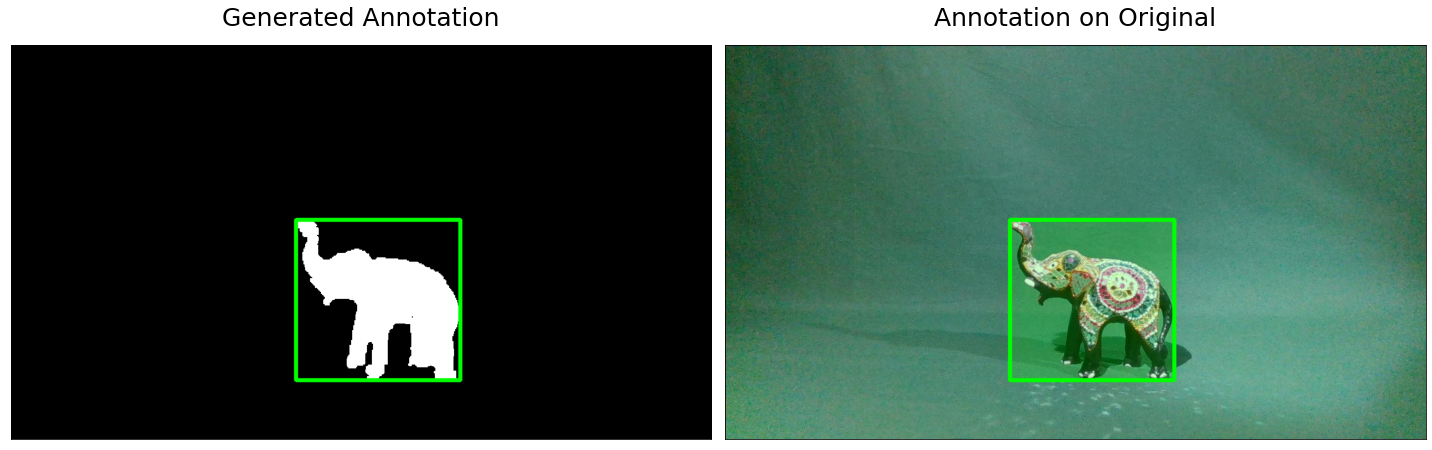

In [291]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(1, 2)

ax[0].imshow(gt_bbox)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(image_bbox_final)
ax[1].set_xticks([])
ax[1].set_yticks([])

col_labels = ['Generated Annotation', 'Annotation on Original']
for i, col_label in enumerate(col_labels):
    ax[i].set_title(col_label, size=25, pad=20)

fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()